Imports

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import random

Load Data

In [2]:
import idx2numpy as dxpy

RESOURCES = [
        '.\\train-images.idx3-ubyte',
        '.\\train-labels.idx1-ubyte',
        '.\\t10k-images.idx3-ubyte',
        '.\\t10k-labels.idx1-ubyte']

#load data in <class 'numpy.ndarray'>
train_images = dxpy.convert_from_file(RESOURCES[0])
train_labels = dxpy.convert_from_file(RESOURCES[1])
test_images = dxpy.convert_from_file(RESOURCES[2])
test_labels = dxpy.convert_from_file(RESOURCES[3])

Print Data

Train images shape: (60000, 28, 28)   |    Train labels shape: (60000,)
Test images shape: (10000, 28, 28)    |   Test labels shape: (10000,)

Random train data label (index:5586): 6 
Random train data image:


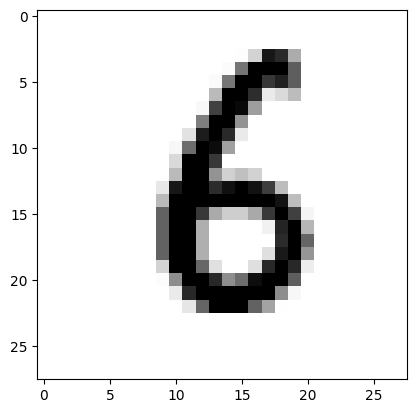

In [3]:
print(f"Train images shape: {train_images.shape}   |    Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}    |   Test labels shape: {test_labels.shape}")

#print a random train data
sample = random.randint(0,6000)

print(f"\nRandom train data label (index:{sample}): {train_labels[sample]} ")
print("Random train data image:")
plt.imshow(train_images[sample], cmap=plt.cm.binary)

Reshape data

In [4]:

train_images = train_images.reshape(60000, -1)
test_images = test_images.reshape(10000, -1)

print(f"Train images shape: {train_images.shape}   |    Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}    |   Test labels shape: {test_labels.shape}")

Train images shape: (60000, 784)   |    Train labels shape: (60000,)
Test images shape: (10000, 784)    |   Test labels shape: (10000,)


Scale Data

In [5]:
train_images = train_images / 255
test_images = test_images / 255

# Check the range of pixel values
print("Training images pixel values range from", train_images.min(), "to", train_images.max())
print("Test images pixel values range from", test_images.min(), "to", test_images.max())

Training images pixel values range from 0.0 to 1.0
Test images pixel values range from 0.0 to 1.0


K-Fold Cross-Validation

In [6]:
from sklearn.model_selection import KFold

n_folds = 5
# prepare cross validation
kfold = KFold(n_folds, shuffle=True, random_state=1)
# assigning data 
for train_ix, test_ix in kfold.split(train_images):
    X_train, X_test = train_images[train_ix], train_images[test_ix]
    y_train, y_test = train_labels[train_ix], train_labels[test_ix]

Convert labels to categorical

In [7]:
from keras import utils

#saving a copy of test labels for later useage in calculating metrics
test_labels_integer_encoded = test_labels

# converting labels to categorical with one-hot-encoding
train_labels =utils.to_categorical(train_labels, num_classes=10)
test_labels = utils.to_categorical(test_labels, num_classes=10)

Model Definition

In [8]:

from keras import Sequential, layers, optimizers, regularizers

# Define the model
model = Sequential()

model.add(layers.Dense(2048, activation='relu', input_dim=784,
                        kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

opt = optimizers.SGD(learning_rate = 0.001, momentum = 0.9)


# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=25, batch_size=100)

# Make predictions
predictions_probabilities = model.predict(test_images)
predictions = np.argmax(predictions_probabilities, axis=1)


c:\Users\spotink\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 50s 68ms/step - accuracy: 0.6354 - loss: 2.2689 - val_accuracy: 0.9356 - val_loss: 1.3150
Epoch 2/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 70ms/step - accuracy: 0.9135 - loss: 1.3925 - val_accuracy: 0.9573 - val_loss: 1.2189
Epoch 3/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 43s 71ms/step - accuracy: 0.9363 - loss: 1.2891 - val_accuracy: 0.9635 - val_loss: 1.1718
Epoch 4/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 71ms/step - accuracy: 0.9471 - loss: 1.2229 - val_accuracy: 0.9671 - val_loss: 1.1371
Epoch 5/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 43s 71ms/step - accuracy: 0.9545 - loss: 1.1757 - val_accuracy: 0.9716 - val_loss: 1.0991
Epoch 6/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 45s 75ms/step - accuracy: 0.9596 - loss: 1.1360 - val_accuracy: 0.9739 - val_loss: 1.0690
Epoch 7/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 46s 77ms/step - accuracy: 0.9639 - loss: 1.0934 - val_accuracy: 0.9755 - val_loss: 1.0445
Epoch 8/25
600/600 ━━━━━━━━━━━━━━━━━━━━ 45s 76ms/step - accuracy: 0.9672 - loss: 1.0594 - 

Metrics

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9815 - loss: 0.6974
Accuracy: 98.43%
Precision: 98.43%
Recall (Sensitivity): 98.43%
F1-Score: 98.43%


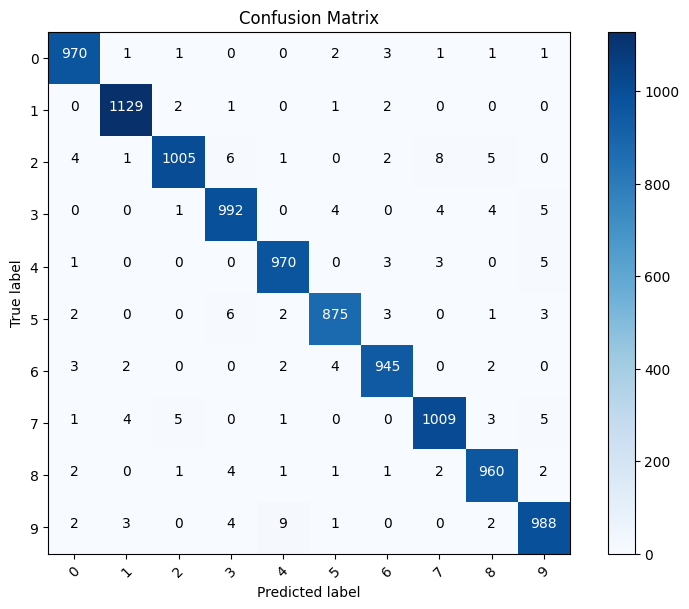

In [9]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import itertools
import numpy as np
from sklearn import metrics


# Evaluate the model
_, acc = model.evaluate(test_images, test_labels)
precision = precision_score(test_labels_integer_encoded, predictions, average='weighted')
recall = recall_score(test_labels_integer_encoded, predictions, average='weighted')
f1 = f1_score(test_labels_integer_encoded, predictions, average='weighted')

print(f'Accuracy: {acc * 100:.2f}%')
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall (Sensitivity): {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")


# Calculate and print the confusion matrix
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
cm = confusion_matrix(np.argmax(test_labels, axis=1), predictions)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, int(cm[i, j]),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

Learning Curve Plots

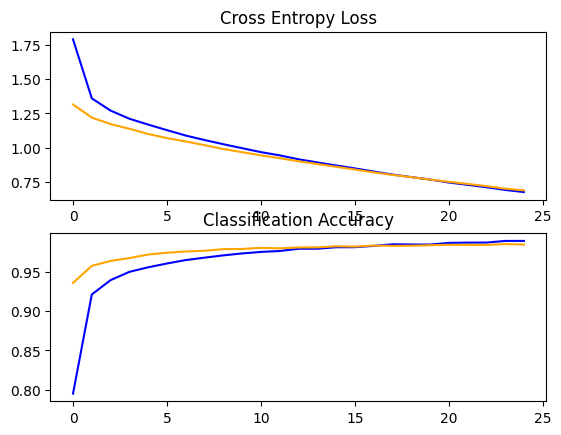

In [10]:
histories = list()
histories.append(history)

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()

summarize_diagnostics(histories)